#### Interpolation between two colors

In [128]:
# Own implementation
def interpolate(factor, start_color, end_color):
    result_color = []

    # Iterate through RGB channel
    for i in range(3):
        # Difference between end and start color
        delta = end_color[i] - start_color[i]

        # Difference (delta) * factor
        ## It gives the amount by which the start
        ## value should change to move towards
        ## the end value
        change = delta * factor

        # Apply the change to the start value
        result_value = start_color[i] + change

        result_color.append(int(result_value))
    
    return tuple(result_color)

# Main
start_color = (255, 0, 0) # Red
end_color = (0, 0, 255) # Blue

result = interpolate(0.5, start_color, end_color)

result

(127, 0, 127)

In [129]:
# Using Pillow library

from PIL import Image

def pillow_interpolate(factor, start_color, end_color):
    start_img = Image.new("RGB", (1, 1), start_color)
    end_img = Image.new("RGB", (1, 1), end_color)
    return Image.blend(start_img, end_img, factor).getpixel((0, 0))

start = (255, 0, 0)  # Red
end = (0, 0, 255)    # Blue
result = pillow_interpolate(0.5, start, end)
print(result)


(127, 0, 127)


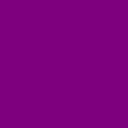

In [130]:
start_img = Image.new("RGB", (128, 128), start_color)
end_img = Image.new("RGB", (128, 128), end_color)
Image.blend(start_img, end_img, alpha=0.5)

In [131]:
Image.blend(start_img, end_img, alpha=0.5).getpixel((0, 0))

(127, 0, 127)

#### Centering the lines on the canvas

In [132]:
from PIL import Image, ImageDraw

[(30, 30), (50, 50), (70, 70)]


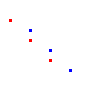

In [133]:
# Create an image
image_size = (100, 100)
image = Image.new("RGB", image_size, "white")

draw = ImageDraw.Draw(image)

# Original points
points = [(10, 20), (30, 40), (50, 60)]

# Draw the original points in the image as red
for point in points:
    draw.rectangle(
        xy=(point[0]-1, point[1]-1, point[0]+1, point[1]+1),
        fill="red"
    )

# To Find the `Bounding Box` points 
## -> smallest rectangle that encloses
## -> all the points
## Find the min and max of XY coordinates
X, Y = [], []
for point in points: # [(10, 20), (30, 40), (50, 60)]
    X.append(point[0]) # [10, 30, 50]
    Y.append(point[1]) # [20, 40, 60]

min_X = min(X)
max_X = max(X)
min_Y = min(Y)
max_Y = max(Y)

# Calculate center of the bounding box
center_X = (min_X + max_X) // 2
center_Y = (min_Y + max_Y) // 2

# Calculate center of rectangle
center_width = image_size[0] // 2
center_height = image_size[1] // 2

# Shift required for centering
delta_X = center_width - center_X
delta_Y = center_height - center_Y


# Apply the shift
centered_points = []

for point in points:
    new_X = point[0] + delta_X
    new_Y = point[1] + delta_Y
    centered_points.append((new_X, new_Y))


# Draw the centered points in the image as red
for point in centered_points:
    draw.rectangle(
        xy=(point[0]-1, point[1]-1, point[0]+1, point[1]+1),
        fill="blue"
    )

print(centered_points)

image

In [134]:
# Original points
points = [(10, 20), (30, 40), (50, 60)]

# Bounding box points
min_X = min(p[0] for p in points)
max_X = max(p[0] for p in points)
min_Y = min(p[1] for p in points)
max_Y = max(p[1] for p in points)

image_size = 100

# Center of bounding box
center_X = (min_X + max_X) // 2
center_Y = (min_Y + max_Y) // 2

# Center of rectangle
center_W = image_size // 2
center_H = image_size //2

# shift required for centering 
delta_X = center_W - center_X
delta_Y = center_H - center_Y

centered_points = []
for point in points:
    new_X = point[0] + delta_X
    new_Y = point[1] + delta_Y
    centered_points.append((new_X, new_Y))

print(centered_points)


[(30, 30), (50, 50), (70, 70)]


##### Anti-aliasing with LANCZOS

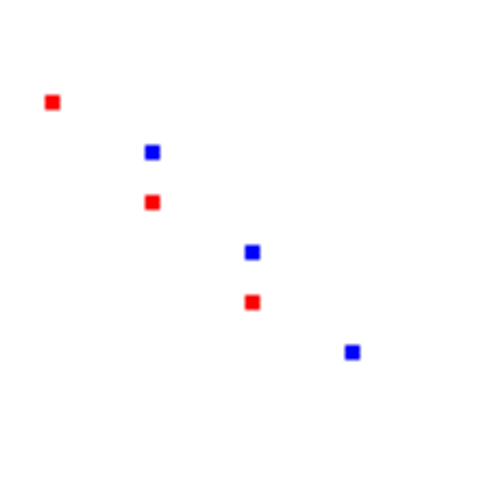

In [135]:
resized_image = image.resize((500, 500))
resized_image

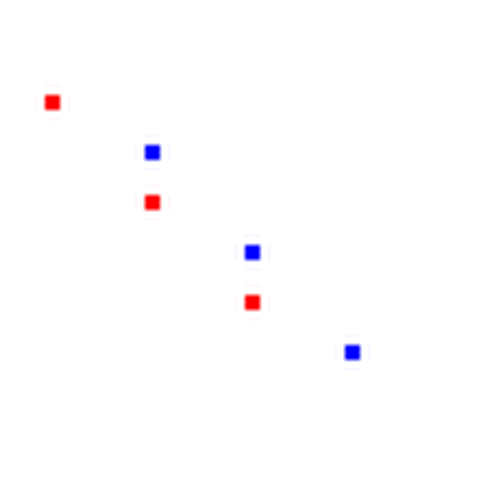

In [136]:
resized_image_LANCZOS = image.resize((500, 500), Image.LANCZOS)
resized_image_LANCZOS